<img src="T0.png" alt="Head" style="width: 700px;"/>
<img src="E.png" alt="Head" style="width: 500px;"/>

# Fuzzy Control Sytem

## Introduction 

### Installation Steps

    pip install -U scikit-fuzzy
    import sys
        !{sys.executable} -m pip install scikit-fuzzy
    or   
    pip3 install -U scikit-fuzzy
    import sys
    !{sys.executable} -m pip3 install scikit-fuzzy


---------------------------------------------------------------

To install this package with conda run one of the following:

    conda install -c conda-forge scikit-fuzzy
    conda install -c conda-forge/label/gcc7 scikit-fuzzy
    conda install -c conda-forge/label/cf201901 scikit-fuzzy
    conda install -c conda-forge/label/cf202003 scikit-fuzzy 

    https://anaconda.org/conda-forge/scikit-fuzzy
        
---------------------------------------------------------------


Link to the Library:
    https://pythonhosted.org/scikit-fuzzy/install.html



### ___Overiveiw and Terminology___

__Fuzzy Logic__ is a methodology predicated on the idea that the “truthiness” of something can be expressed over a continuum. This is to say that something isn’t true or false but instead partially true or partially false.

A __fuzzy variable__ has a __crisp value__ which takes on some number over a pre-defined domain (in fuzzy logic terms, called a __universe__). The crisp value is how we think of the variable using normal mathematics. For example, if my fuzzy variable was how much to tip someone, it’s universe would be 0 to 25% and it might take on a crisp value of 15%.

A fuzzy variable also has several __terms__ that are used to describe the variable. The terms taken together are the __fuzzy set__ which can be used to describe the “fuzzy value” of a fuzzy variable. These terms are usually adjectives like “poor,” “mediocre,” and “good.” Each term has a __membership function__ that defines how a crisp value maps to the term on a scale of 0 to 1. In essence, it describes “how good” something is.

So, back to the tip example, a “good tip” might have a membership function which has non-zero values between 15% and 25%, with 25% being a “completely good tip” (ie, it’s membership is 1.0) and 15% being a “barely good tip” (ie, its membership is 0.1).

A __fuzzy control system__ links fuzzy variables using a set of rules. These __rules__ are simply mappings that describe how one or more fuzzy variables relates to another. These are expressed in terms of an IF-THEN statement; the IF part is called the __antecedent__ and the THEN part is the consequent. In the tiping example, one rule might be “IF the service was good THEN the tip will be good.” The exact math related to how a rule is used to calcualte the value of the __consequent__ based on the value of the antecedent is outside the scope of this primer.

## ___Example 1: The Tipping Problem___
Taking the tipping example full circle, if we were to create a controller which estimates the tip we should give at a restaurant, we might structure it as such:

__Antecednets (Inputs)__

     service
* Universe (ie, crisp value range): How good was the service of the waitress, on a scale of 1 to 10?

* Fuzzy set (ie, fuzzy value range): poor, acceptable, amazing

      food quality
* Universe: How tasty was the food, on a scale of 1 to 10?
* Fuzzy set: bad, decent, great

__Consequents (Outputs)__

       tip
* Universe: How much should we tip, on a scale of 0% to 25%
* Fuzzy set: low, medium, high

       Rules
* IF the service was good or the food quality was good, THEN the tip will be high.
* IF the service was average, THEN the tip will be medium.
* IF the service was poor and the food quality was poor THEN the tip will be low.

      Usage 
* If I tell this controller that I rated:
** the service as 9.8, and
** the quality as 6.5,
* it would recommend I leave:
** a 20.2% tip.


___MATLAB virsion___

https://uk.mathworks.com/help/fuzzy/an-introductory-example-fuzzy-versus-nonfuzzy-logic.html

In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
%matplotlib inline
import matplotlib.pyplot as plt

### Fuzzy rules

Now, to make these triangles useful, we define the fuzzy relationship between input and output variables. For the purposes of our example, consider three simple rules:

1. If the food is bad OR the service is poor, then the tip will be low
2. If the service is acceptable, then the tip will be medium
3. If the food is great OR the service is amazing, then the tip will be high.

Most people would agree on these rules, but the rules are fuzzy. Mapping the imprecise rules into a defined, actionable tip is a challenge. This is the kind of task at which fuzzy logic excels.

### Rule application

What would the tip be in the following circumstance:

* Food quality was 6.5
* Service was 9.8

#### Rule aggregation
With the activity of each output membership function known, all output membership functions must be combined. This is typically done using a maximum operator. This step is also known as aggregation.

### Defuzzification
Finally, to get a real world answer, we return to crisp logic from the world of fuzzy membership functions. For the purposes of this example the centroid method will be used.

___The result is a tip of 20.2%.___

### Creating the Tipping Controller Using the skfuzzy control API

We can use the skfuzzy control system API to model this. First, let’s define fuzzy variables

In [2]:

# New Antecedent/Consequent objects hold universe variables and membership
# functions
quality = ctrl.Antecedent(np.arange(0, 11, 1), 'quality')
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
tip = ctrl.Consequent(np.arange(0, 26, 1), 'tip')

# Auto-membership function population is possible with .automf(3, 5, or 7)
quality.automf(3)
service.automf(3)

# Custom membership functions can be built interactively with a familiar,
# Pythonic API
tip['low'] = fuzz.trimf(tip.universe, [0, 0, 13])
tip['medium'] = fuzz.trimf(tip.universe, [0, 13, 25])
tip['high'] = fuzz.trimf(tip.universe, [13, 25, 25])

To help understand what the membership looks like, use the view methods.

/Users/salemameen/opt/anaconda3/lib/python3.8/site-packages/skfuzzy/control/term.py:74: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


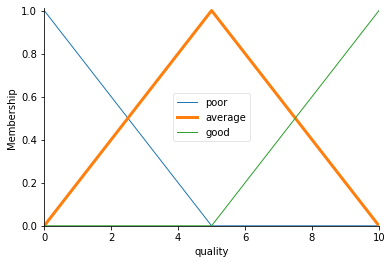

In [3]:
# You can see how these look with .view()
quality['average'].view()

/Users/salemameen/opt/anaconda3/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


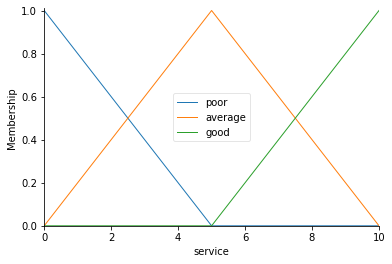

In [4]:
service.view()

/Users/salemameen/opt/anaconda3/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


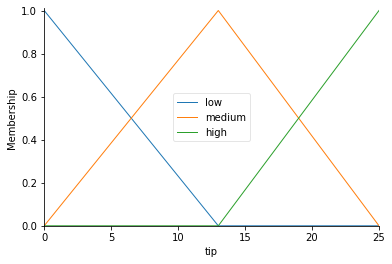

In [5]:
tip.view()

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

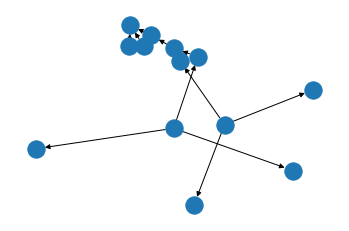

In [6]:
rule1 = ctrl.Rule(quality['poor'] | service['poor'], tip['low'])
rule2 = ctrl.Rule(service['average'], tip['medium'])
rule3 = ctrl.Rule(service['good'] | quality['good'], tip['high'])

rule1.view()

#### Control System Creation and Simulation

Now that we have our rules defined, we can simply create a control system via:



In [7]:
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

19.847607361963192


/Users/salemameen/opt/anaconda3/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


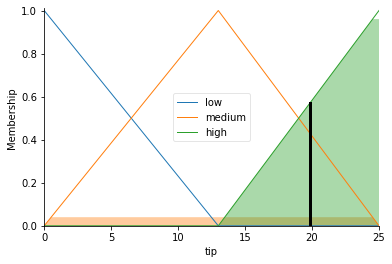

In [8]:
tipping.input['quality'] = 6.5
tipping.input['service'] = 9.8

# Crunch the numbers
tipping.compute()
print(tipping.output['tip'])
tip.view(sim=tipping)

## ___Example 2: Room Temperature___


Example from the Lecture


<img src="T1.png" alt="Room" style="width: 600px;"/>

In [9]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
%matplotlib inline
import matplotlib.pyplot as plt
# New Antecedent/Consequent objects hold universe variables and membership
# functions
Temp = ctrl.Antecedent(np.arange(0, 50, 1), 'Temperature')
Command = ctrl.Consequent(np.arange(0, 50, 1), 'Command')
# Auto-membership function population is possible with .automf(3, 5, or 7)
Temp.automf(3)

Command['Heating'] = fuzz.trimf(Command.universe, [0, 0, 20])
Command['Maintaining'] = fuzz.trimf(Command.universe, [0, 20, 28])
Command['Cooling'] = fuzz.trimf(Command.universe, [13, 28, 50])

<img src="T2.png" alt="Room_Rules" style="width: 800px;"/>

In [10]:
rule1 = ctrl.Rule(Temp['poor'], Command['Heating'])
rule2 = ctrl.Rule(Temp['average'], Command['Maintaining'])
rule3 = ctrl.Rule(Temp['good'] , Command['Cooling'])

In [11]:
Temp_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
Temprature = ctrl.ControlSystemSimulation(Temp_ctrl)

15.706100808717542


/Users/salemameen/opt/anaconda3/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


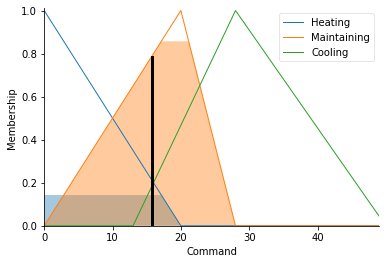

In [12]:
Temprature.input['Temperature'] = 21

# Crunch the numbers
Temprature.compute()
print(Temprature.output['Command'])
Command.view(sim=Temprature)

## ___Example 2: Industrial chemical process___


<img src="T6.png" alt="process" style="width: 500px;"/>

Many fuzzy control systems are tasked to keep a certain variable close to a specific value. For instance, the temperature for an industrial chemical process might need to be kept relatively constant. In order to do this, the system usually knows two things:

    The error, or deviation from the ideal value
    The way the error is changing. This is the mathematical first derivative; we’ll call it delta

From these two values we can construct a system which will act appropriately.
Set up the Fuzzy Control System

We’ll use the new control system API for this problem. It would be far too complicated to model manually!



In [13]:
# Sparse universe makes calculations faster, without sacrifice accuracy.
# Only the critical points are included here; making it higher resolution is
# unnecessary.
universe = np.linspace(-2, 2, 5)

# Create the three fuzzy variables - two inputs, one output
error = ctrl.Antecedent(universe, 'error')
delta = ctrl.Antecedent(universe, 'delta')
output = ctrl.Consequent(universe, 'output')

# Here we use the convenience `automf` to populate the fuzzy variables with
# terms. The optional kwarg `names=` lets us specify the names of our Terms.
names = ['nb', 'ns', 'ze', 'ps', 'pb']
error.automf(names=names)
delta.automf(names=names)
output.automf(names=names)

/Users/salemameen/opt/anaconda3/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/Users/salemameen/opt/anaconda3/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/Users/salemameen/opt/anaconda3/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


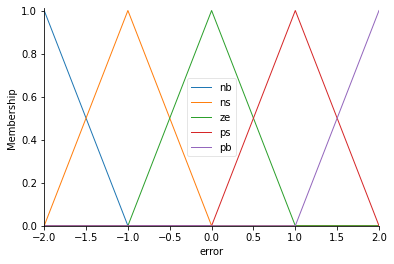

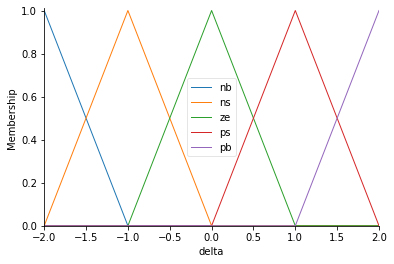

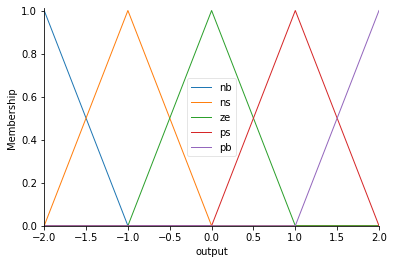

In [14]:
## To see the membership function of error, delta and output
error.view()
delta.view()
output.view()

In [15]:
# Define complex rules
rule0 = ctrl.Rule(antecedent=((error['nb'] & delta['nb']) |
                              (error['ns'] & delta['nb']) |
                              (error['nb'] & delta['ns'])),
                  consequent=output['nb'], label='rule nb')

rule1 = ctrl.Rule(antecedent=((error['nb'] & delta['ze']) |
                              (error['nb'] & delta['ps']) |
                              (error['ns'] & delta['ns']) |
                              (error['ns'] & delta['ze']) |
                              (error['ze'] & delta['ns']) |
                              (error['ze'] & delta['nb']) |
                              (error['ps'] & delta['nb'])),
                  consequent=output['ns'], label='rule ns')

rule2 = ctrl.Rule(antecedent=((error['nb'] & delta['pb']) |
                              (error['ns'] & delta['ps']) |
                              (error['ze'] & delta['ze']) |
                              (error['ps'] & delta['ns']) |
                              (error['pb'] & delta['nb'])),
                  consequent=output['ze'], label='rule ze')

rule3 = ctrl.Rule(antecedent=((error['ns'] & delta['pb']) |
                              (error['ze'] & delta['pb']) |
                              (error['ze'] & delta['ps']) |
                              (error['ps'] & delta['ps']) |
                              (error['ps'] & delta['ze']) |
                              (error['pb'] & delta['ze']) |
                              (error['pb'] & delta['ns'])),
                  consequent=output['ps'], label='rule ps')

rule4 = ctrl.Rule(antecedent=((error['ps'] & delta['pb']) |
                              (error['pb'] & delta['pb']) |
                              (error['pb'] & delta['ps'])),
                  consequent=output['pb'], label='rule pb')

In [16]:
system = ctrl.ControlSystem(rules=[rule0, rule1, rule2, rule3, rule4])
sim = ctrl.ControlSystemSimulation(system)

0.6908163265306123


/Users/salemameen/opt/anaconda3/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


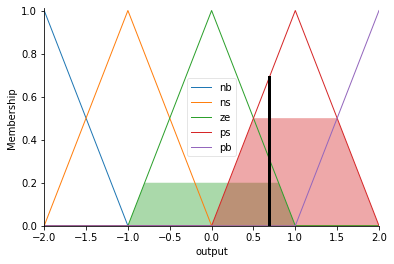

In [17]:
sim.input['error'] = 0.5
sim.input['delta'] = 0.8

# Crunch the numbers
sim.compute()
print(sim.output['output'])
output.view(sim=sim)

### Optional View the control space

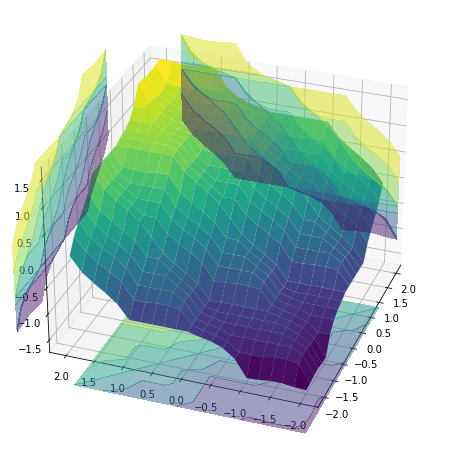

In [18]:
# We can simulate at higher resolution with full accuracy
upsampled = np.linspace(-2, 2, 21)
x, y = np.meshgrid(upsampled, upsampled)
z = np.zeros_like(x)

# Loop through the system 21*21 times to collect the control surface
for i in range(21):
    for j in range(21):
        sim.input['error'] = x[i, j]
        sim.input['delta'] = y[i, j]
        sim.compute()
        z[i, j] = sim.output['output']

# Plot the result in pretty 3D with alpha blending
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Required for 3D plotting

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='viridis',
                       linewidth=0.4, antialiased=True)

cset = ax.contourf(x, y, z, zdir='z', offset=-2.5, cmap='viridis', alpha=0.5)
cset = ax.contourf(x, y, z, zdir='x', offset=3, cmap='viridis', alpha=0.5)
cset = ax.contourf(x, y, z, zdir='y', offset=3, cmap='viridis', alpha=0.5)

ax.view_init(30, 200)